In [1]:
import pandas as pd
import numpy as np

from __future__ import print_function
import time

from pprint import pprint

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpld3

import plotly.express as px

import seaborn as sns

pd.set_option('display.max_rows', 500)

In [2]:
class QDA:
    def fit(self, X, t):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()
        
        self.classes = np.unique(t)
        
        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            self.covs[c] = np.cov(X_c, rowvar=False)
    
    def predict(self, X):
        preds = list()
        for x in X:
            posts = list()
            for c in self.classes:
                prior = np.log(self.priors[c])
                inv_cov = np.linalg.inv(self.covs[c])
                inv_cov_det = np.linalg.det(inv_cov)
                diff = x-self.means[c]
                likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                post = prior + likelihood
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

In [3]:
refined_df = pd.read_csv('./data/BFO_film_synth_df_refined.csv')
feature_list = list(refined_df.drop([
    'impurity_code',
    'age_days',
    'age_temp_degC',
    'MOE_EG_ratio',
    'nitrate_precs',
    'carbonyl',
    'hydroxyl',
    'carboxyl',
    'ether',
    'amine',
    'air_atm',
    'o2_atm',
    'n2_atm'
], axis=1).columns)

In [4]:
x = refined_df[feature_list].fillna(0).values

norm_x = StandardScaler().fit_transform(x)

#try hyperbolic tangent scaler

pca = PCA(n_components=3)
pca_result = pca.fit_transform(norm_x)

refined_df['pca-one'] = pca_result[:,0]
refined_df['pca-two'] = pca_result[:,1]
refined_df['pca-three'] = pca_result[:,2]

print('Variation per first three principal components: ', pca.explained_variance_ratio_)

Variation per first three principal components:  [0.17703432 0.15584008 0.10386821]


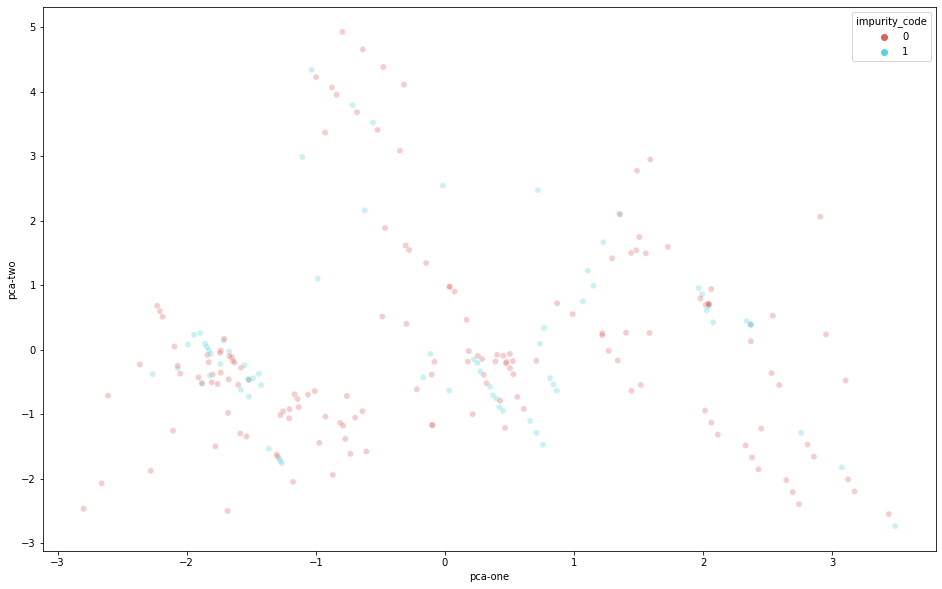

In [5]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="impurity_code",
    palette=sns.color_palette('hls', 2),
    data=refined_df,
    legend="full",
    alpha=0.3
)

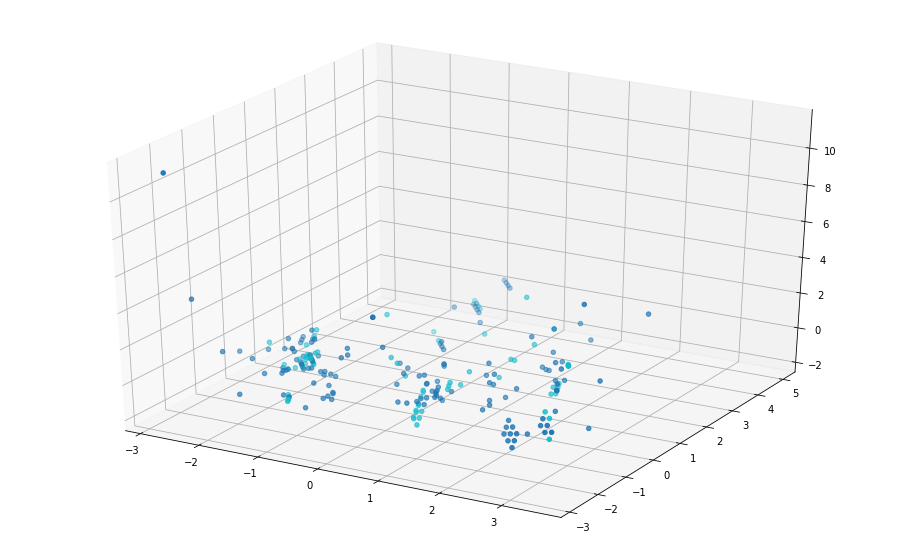

In [6]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')

ax.scatter(
    xs=refined_df["pca-one"],
    ys=refined_df["pca-two"],
    zs=refined_df["pca-three"],
    c=refined_df["impurity_code"],
    cmap='tab10'
)

plt.show()

In [7]:
X = pd.concat([refined_df['pca-one'], refined_df['pca-two']], axis=1).to_numpy()
t = refined_df['impurity_code'].to_numpy()

qda = QDA()
qda.fit(X, t)
preds = qda.predict(X)
print(preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [8]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=128)
tsne_results = tsne.fit_transform(x)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 223 samples in 0.000s...
[t-SNE] Computed neighbors for 223 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 223 / 223
[t-SNE] Mean sigma: 10.299254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.511955
[t-SNE] KL divergence after 300 iterations: 0.604099
t-SNE done! Time elapsed: 0.2546389102935791 seconds



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [26/Oct/2021 17:28:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Oct/2021 17:28:07] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Oct/2021 17:28:07] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Oct/2021 17:28:07] code 404, message Not Found
127.0.0.1 - - [26/Oct/2021 17:28:07] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


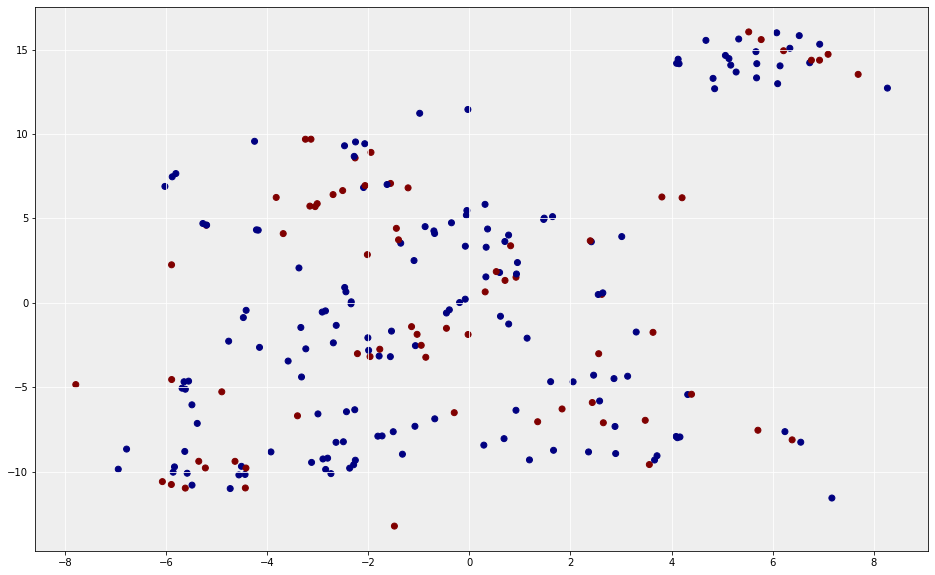

In [9]:
refined_df['tsne-2d-one'] = tsne_results[:,0]
refined_df['tsne-2d-two'] = tsne_results[:,1]

fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(16,10))
scatter = ax.scatter(
    x=refined_df["tsne-2d-one"], 
    y=refined_df["tsne-2d-two"],
    c=refined_df["impurity_code"],
    cmap=plt.cm.jet
)
ax.grid(color="white", linestyle="solid")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=refined_df.recipe_id.to_list())
mpld3.plugins.connect(fig, tooltip)

mpld3.show()

0.7533632286995515


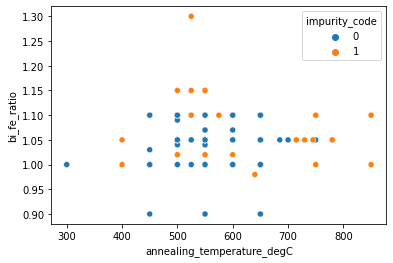

In [34]:
X = pd.concat([refined_df['annealing_temperature_degC'], refined_df['bi_fe_ratio']], axis=1).to_numpy()
t = refined_df['impurity_code'].to_numpy()

qda = QDA()
qda.fit(X, t)
preds = qda.predict(X)

correct = 0
for true, pred in zip(t, preds):
    if true == pred:
        correct +=1 

print(correct/len(t))

scatter = pd.concat([
    pd.DataFrame(X, columns=['annealing_temperature_degC', 'bi_fe_ratio']), 
    pd.DataFrame(t, columns=['impurity_code'])
], axis=1)

sns.scatterplot(data=scatter, x='annealing_temperature_degC', y='bi_fe_ratio', hue='impurity_code')